In [199]:
#pip install --upgrade scikit-learn

In [200]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# Import label encoder 
from sklearn import preprocessing 

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

"""
The line warnings.filterwarnings('ignore') is used to ignore all warning messages. It essentially 
suppresses the display of warning messages to the console or standard error output. This can be 
useful in situations where you want to run your code without being interrupted or cluttered with 
warning messages, especially when you are aware of the warnings and have intentionally decided to 
ignore them.
"""
import warnings
warnings.filterwarnings('ignore')

In [201]:
# Read the CSV file into a DataFrame
df=pd.read_csv('classData.csv')
#df.head(8)

# Define a function to highlight the background color
def highlight_background(val):
    return 'background-color: lightblue;border: 1.5px solid red; color:black' # You can choose any color you prefer

# Apply the style to the DataFrame using the Styler
styled_df = df.head(8).style.applymap(highlight_background)

# Display the styled DataFrame
styled_df

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
5,1,0,0,1,-632.312778,-181.714572,-90.795453,0.193116,-0.086144,-0.106972
6,1,0,0,1,-557.391809,-119.468643,-29.529450,0.210004,-0.076712,-0.133291
7,1,0,0,1,-458.799929,-96.318922,-7.381847,0.273652,-0.067262,-0.206389


In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


In [203]:
 # Representing faults in one Fault_Type Column
df['Fault_Type'] = df['G'].astype('str') + df['C'].astype('str') + df['B'].astype('str') + df['A'].astype('str')

# Define a function to highlight the background color
def highlight_background(val):
    return 'background-color: lightblue;border: 1.5px solid red; color:black' # You can choose any color you prefer

# Apply the style to the DataFrame using the Styler
df.head(8).style.applymap(highlight_background)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001
5,1,0,0,1,-632.312778,-181.714572,-90.795453,0.193116,-0.086144,-0.106972,1001
6,1,0,0,1,-557.391809,-119.468643,-29.529450,0.210004,-0.076712,-0.133291,1001
7,1,0,0,1,-458.799929,-96.318922,-7.381847,0.273652,-0.067262,-0.206389,1001


In [204]:
df["Fault_Type"].unique()

array(['1001', '1011', '0110', '0111', '1111', '0000'], dtype=object)

In [205]:
# Replacing Values of Fault Type For Easy Visualization

df['Fault_Type'][df['Fault_Type'] == '0000' ] = 'NO Fault'
df['Fault_Type'][df['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
df['Fault_Type'][df['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
df['Fault_Type'][df['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
df['Fault_Type'][df['Fault_Type'] == '0111' ] = 'Line A Line B Line C Fault'
df['Fault_Type'][df['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

# Define a function to highlight the background color
def highlight_background(val):
    return 'background-color: lightgreen;border: 1.5px solid red; color:black' # You can choose any color you prefer

# Apply the style to the DataFrame using the Styler
df.head(8).style.applymap(highlight_background)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,Line A to Ground Fault
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,Line A to Ground Fault
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,Line A to Ground Fault
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,Line A to Ground Fault
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,Line A to Ground Fault
5,1,0,0,1,-632.312778,-181.714572,-90.795453,0.193116,-0.086144,-0.106972,Line A to Ground Fault
6,1,0,0,1,-557.391809,-119.468643,-29.529450,0.210004,-0.076712,-0.133291,Line A to Ground Fault
7,1,0,0,1,-458.799929,-96.318922,-7.381847,0.273652,-0.067262,-0.206389,Line A to Ground Fault


In [206]:
# Analyzing the count of different types of fault types.
df['Fault_Type'].value_counts(ascending=False)

Fault_Type
NO Fault                                2365
Line A Line B to Ground Fault           1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A Line B Line C Fault              1096
Line B to Line C Fault                  1004
Name: count, dtype: int64

In [207]:
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

df_new=df.copy()
# Encode labels in column 'species'. 
df_new['Fault_Type']= label_encoder.fit_transform(df_new['Fault_Type']) 
  
df_new['Fault_Type'].unique() 

array([3, 2, 4, 0, 1, 5])

In [208]:
# Get the mapping of original categories to numerical values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print(label_mapping)

{'Line A Line B Line C Fault': 0, 'Line A Line B Line C to Ground Fault': 1, 'Line A Line B to Ground Fault': 2, 'Line A to Ground Fault': 3, 'Line B to Line C Fault': 4, 'NO Fault': 5}


In [209]:
df_new.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,3
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,3
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,3
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,3
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,3


In [210]:
X = df_new.drop(['Fault_Type','G','C','B','A'],axis=1)
Y=df_new['Fault_Type']

In [211]:
"""scaling of train and test data for better optimization, due to scaling gradient descent can find 
much more direct path to the """

# global minima
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = sc.fit_transform(X)




In [212]:
X

array([[-0.35508652,  0.08006492,  0.13853412,  1.41256321, -0.427823  ,
        -0.89103573],
       [-0.75295515, -0.07157341, -0.04328806,  1.10814177, -0.39814437,
        -0.63536224],
       [-1.11168348, -0.29551585, -0.31075745,  0.94557408, -0.36836805,
        -0.51300488],
       ...,
       [-0.170359  ,  0.18513134, -0.02232876,  0.41771147, -1.78472396,
         1.4245578 ],
       [-0.16946153,  0.18286615, -0.02077068,  0.44986841, -1.79392343,
         1.4037238 ],
       [-0.16853358,  0.18059794, -0.01924721,  0.48191057, -1.80266717,
         1.38253366]])

In [213]:
# Train Test Split 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.20,random_state=30)

In [214]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

acc=0
state=1
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.20,random_state=i)
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train,Y_train)
    pred_knn = knn.predict(X_test)
    if(accuracy_score(Y_test, pred_knn)>acc):
        acc=accuracy_score(Y_test, pred_knn)
        state=i

print('Best Accuracy {}'.format(acc))
print('Best Random State {}'.format(state))


Best Accuracy 0.912269548633185
Best Random State 797


In [215]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.20,random_state=797)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,Y_train)
pred_knn = knn.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, pred_knn)))

Accuracy: 0.91


In [216]:
print(classification_report(Y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66       201
           1       0.68      0.72      0.70       219
           2       1.00      0.98      0.99       259
           3       0.98      1.00      0.99       220
           4       1.00      1.00      1.00       200
           5       1.00      1.00      1.00       474

    accuracy                           0.91      1573
   macro avg       0.89      0.89      0.89      1573
weighted avg       0.91      0.91      0.91      1573



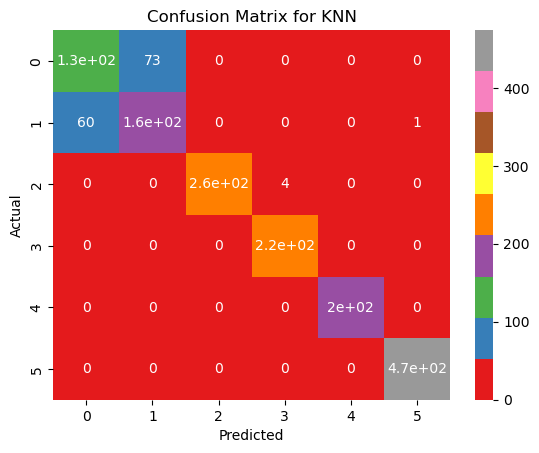

In [217]:
# When Ever we have any Kind of table we can represent
# it using Heat Map
conf_matrix=confusion_matrix(Y_test,pred_knn)
sns.heatmap(conf_matrix,annot=True,cmap='Set1')

plt.title("Confusion Matrix for KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [218]:
from sklearn.tree import DecisionTreeClassifier

acc=0
state=1
for i in range(1,1000):
  X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.20,random_state=i)
  dtree = DecisionTreeClassifier()
  dtree.fit(X_train,Y_train)
  pred_dt = dtree.predict(X_test)
  if(accuracy_score(Y_test, pred_dt)>acc):
        acc=accuracy_score(Y_test, pred_dt)
        state=i

print('Best Accuracy {}'.format(acc))
print('Best Random State {}'.format(state))
  
    

Best Accuracy 0.9097266369993643
Best Random State 997


In [228]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.20,random_state=997)
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
pred_dt = dtree.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, pred_dt)))

Accuracy: 0.91


In [229]:
print(classification_report(Y_test,pred_dt))

              precision    recall  f1-score   support

           0       0.69      0.68      0.68       217
           1       0.68      0.69      0.68       214
           2       0.99      1.00      0.99       237
           3       1.00      1.00      1.00       230
           4       0.99      0.99      0.99       193
           5       1.00      1.00      1.00       482

    accuracy                           0.91      1573
   macro avg       0.89      0.89      0.89      1573
weighted avg       0.91      0.91      0.91      1573



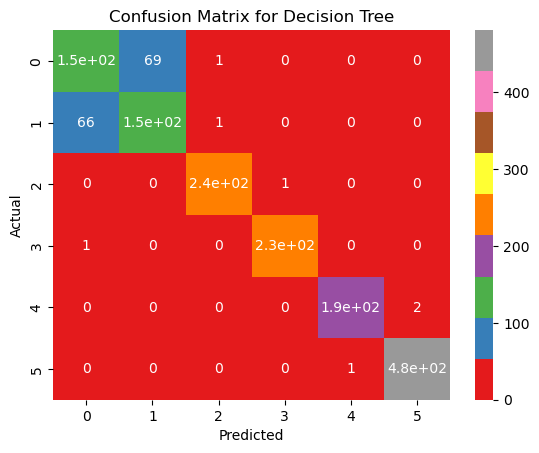

In [230]:
# When Ever we have any Kind of table we can represent
# it using Heat Map
conf_matrix=confusion_matrix(Y_test,pred_dt)
sns.heatmap(conf_matrix,annot=True,cmap='Set1')

plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [222]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.20,random_state=1000)
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
pred_rf = rf.predict(X_test)
print('Accuracy: {:.2f}'.format(accuracy_score(Y_test, pred_rf)))

Accuracy: 0.90


In [223]:
print(classification_report(Y_test,pred_rf))

              precision    recall  f1-score   support

           0       0.58      0.57      0.58       195
           1       0.62      0.62      0.62       215
           2       1.00      1.00      1.00       232
           3       1.00      1.00      1.00       235
           4       1.00      1.00      1.00       191
           5       1.00      1.00      1.00       505

    accuracy                           0.90      1573
   macro avg       0.87      0.87      0.87      1573
weighted avg       0.89      0.90      0.89      1573



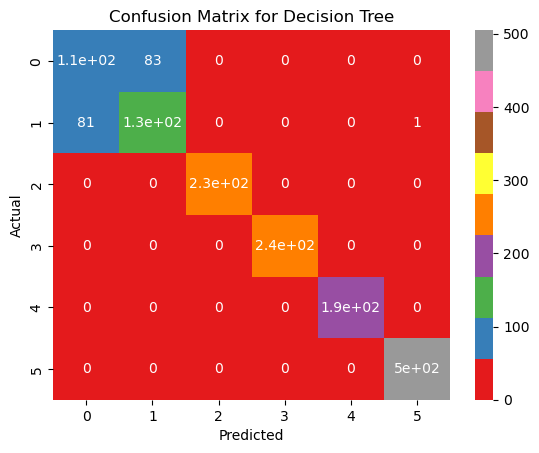

In [224]:
# When Ever we have any Kind of table we can represent
# it using Heat Map
conf_matrix=confusion_matrix(Y_test,pred_rf)
sns.heatmap(conf_matrix,annot=True,cmap='Set1')

plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [231]:
import pickle
pickle.dump(sc,open('scaler.pkl','wb'))
pickle.dump(knn,open('knn.pkl','wb'))

In [232]:
model=pickle.load(open('knn.pkl','rb'))
standard_scaler=pickle.load(open('scaler.pkl','rb'))

In [233]:
new_data_scaled=standard_scaler.transform([[-151,-9.67,85.8,0.4,-0.132,-0.2678]])
result=model.predict(new_data_scaled)
result

array([3])